# TASK 1 Supervised Learning using ML.                                                       

# Predict the percentage of an student based on the no. of study hours.

# Author : Prajakti Dutta

# Importing the neccessary libraries

In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline

# Loading the dataset

In [2]:
stud=pd.read_csv(r"C:\Users\Prajakti Dutta\Desktop\students.csv")
stud.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [3]:
stud.head()   #First 5 elements

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
stud.tail()   #Last 5 elements

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
stud.shape #dimensions of data(rows,columns)

(25, 2)

# Checking for any null values

In [7]:
stud.isnull().any()

Hours     False
Scores    False
dtype: bool

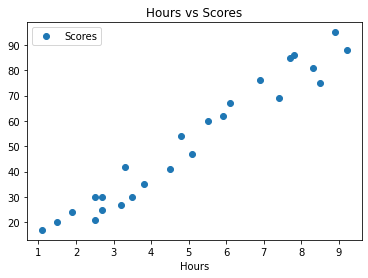

In [10]:
stud.plot(x="Hours", y="Scores", style='o')
plt.title("Hours vs Scores")
plt.show()

# Dividing the data into values and labels

In [15]:
X=stud.iloc[:,:-1].values  #values
y=stud.iloc[:,1].values    #labels


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

# Applying Linear Regression to the training data

In [17]:
#Linear Regression to the training data
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)
print("Training completed")

Training completed


# Visualisng the linear regression line

Slope is: [9.91065648]
Intercept is: 2.018160041434683


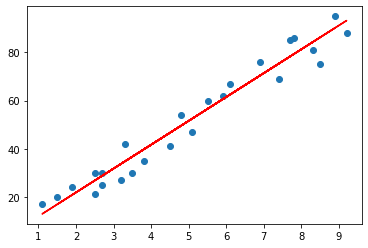

In [18]:
#Plotting the linear regression line
line=reg.coef_*X+reg.intercept_
print("Slope is:",reg.coef_)
print("Intercept is:",reg.intercept_)

plt.scatter(X,y)
plt.plot(X,line,color='red')
plt.show()

# Predicting the percentage based on no of hours

In [19]:
Y_pred=reg.predict(X_test)
stud1=pd.DataFrame({'Actual scores':y_test,'Predicted score':Y_pred})
stud1
#Actual and predicted values are not same

,Actual scores,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [24]:
#PREDICTING THE PERCENTAGE OF THE STUDENT IF HE/SHE STUDIES FOR 9.25 HOURS/DAY
percentage=reg.predict([[9.25]])
print("Percentage after studying for 9.25 hrs/day",percentage)

Percentage after studying for 9.25 hrs/day [93.69173249]


# Evaluating the algorithm

In [26]:
#Evaluating the algorithm
from sklearn import metrics
print("Mean Absolute Error is",metrics.mean_absolute_error(y_test,Y_pred))
print("Mean Square Error is",metrics.mean_squared_error(y_test,Y_pred))
print("Root Mean Square Error",py.sqrt(metrics.mean_squared_error(y_test,Y_pred)))


Mean Absolute Error is 4.183859899002975
Mean Square Error is 21.5987693072174
Root Mean Square Error 4.6474476121003665
